https://www.datacamp.com/tutorial/cnn-tensorflow-python#rdl

In [5]:
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


In [14]:
import matplotlib.pyplot as plt


def show_images(train_images,
                class_names,
                train_labels,
                nb_samples=12, nb_row=4):

    plt.figure(figsize=(12,12))
    for i in range(nb_samples):
        plt.subplot(nb_row,nb_row,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i][0]])
    plt.show()



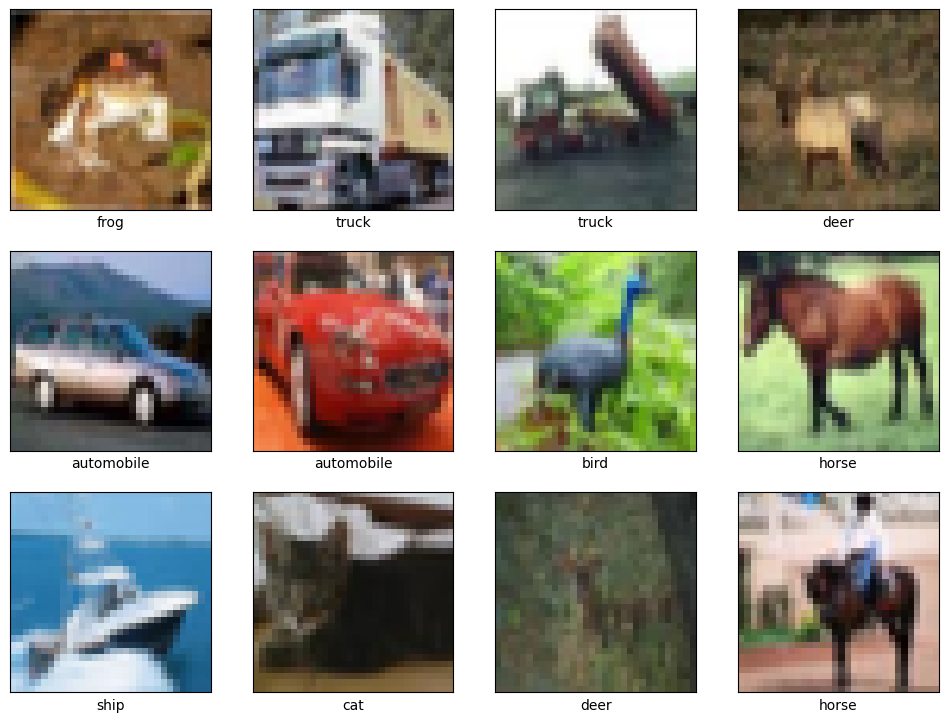

In [15]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

show_images(train_images, class_names, train_labels)


### 数据预处理
在训练模型之前，我们需要将数据的像素值归一化在同一范围内（例如 0 到 1）。这是处理图像时常见的预处理步骤，以确保尺度不变性，并在训练过程中更快地收敛。 

In [16]:
max_pixel_value = 255

train_images = train_images / max_pixel_value
test_images = test_images / max_pixel_value


In [17]:
# 另外，我们注意到标签以分类格式表示，如猫、马、鸟等。我们需要将它们转换为数字格式，以便神经网络可以轻松处理它们。
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels, len(class_names))
test_labels = to_categorical(test_labels, len(class_names))


In [18]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Variables
INPUT_SHAPE = (32, 32, 3)
FILTER1_SIZE = 32
FILTER2_SIZE = 64
FILTER_SHAPE = (3, 3)
POOL_SHAPE = (2, 2)
FULLY_CONNECT_NUM = 128
NUM_CLASSES = len(class_names)

# Model architecture implementation
model = Sequential()
model.add(Conv2D(FILTER1_SIZE, FILTER_SHAPE,
          activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Conv2D(FILTER2_SIZE, FILTER_SHAPE, activation='relu'))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Flatten())
model.add(Dense(FULLY_CONNECT_NUM, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))


d:\ProgramData\anaconda3\envs\ai\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [19]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

### 模型训练
所有资源最终都可用于配置和触发模型的训练。这分别通过compile()和fit()函数完成，它们采用以下参数： 

优化器负责更新模型的权重和偏差。在我们的例子中，我们使用 Adam 优化器。 
损失函数用于衡量错误分类错误，我们使用 Crosentropy()。
最后，用指标来衡量模型的性能，准确率、精确率和召回率将显示在我们的用例中。

In [20]:
from tensorflow.keras.metrics import Precision, Recall

BATCH_SIZE = 32
EPOCHS = 30

METRICS = metrics = ['accuracy',
                     Precision(name='precision'),
                     Recall(name='recall')]

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=METRICS)

# Train the model
training_history = model.fit(train_images, train_labels,
                             epochs=EPOCHS, batch_size=BATCH_SIZE,
                             validation_data=(test_images, test_labels))


Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3931 - loss: 1.6625 - precision: 0.6455 - recall: 0.1549 - val_accuracy: 0.5587 - val_loss: 1.2300 - val_precision: 0.7284 - val_recall: 0.3794
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6028 - loss: 1.1196 - precision: 0.7578 - recall: 0.4441 - val_accuracy: 0.6554 - val_loss: 0.9837 - val_precision: 0.7642 - val_recall: 0.5406
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6735 - loss: 0.9285 - precision: 0.7917 - recall: 0.5566 - val_accuracy: 0.6805 - val_loss: 0.9245 - val_precision: 0.7924 - val_recall: 0.5654
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7173 - loss: 0.8161 - precision: 0.8155 - recall: 0.6180 - val_accuracy: 0.6915 - val_loss: 0.8963 - val_precision: 0.7854 - val_recall: 0.5981
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7428 - loss: 0.7352 - precision: 0.8283 - recall: 0.6615 - val_accuracy: 0.6903 - v

### 模型评估
模型训练完成后，我们可以通过使用show_performance_curve()辅助函数在二维中 绘制上述指标，来比较其在训练和测试数据集上的性能。

横轴（x）是 epoch 的数量
垂直线（y）表示模型的底层性能。 
该曲线表示特定时期的指标值。
为了更好地可视化，在训练和验证性能值与最佳值的交点处绘制了一条垂直红线。

In [23]:
import numpy as np
def show_performance_curve(training_result, metric, metric_label):

	train_perf = training_result.history[str(metric)]
	validation_perf = training_result.history['val_'+str(metric)]
	intersection_idx = np.argwhere(np.isclose(train_perf,
                                           validation_perf, atol=1e-2)).flatten()[0]
	intersection_value = train_perf[intersection_idx]

	plt.plot(train_perf, label=metric_label)
	plt.plot(validation_perf, label='val_'+str(metric))
	plt.axvline(x=intersection_idx, color='r',
	            linestyle='--', label='Intersection')

	plt.annotate(f'Optimal Value: {intersection_value:.4f}',
              xy=(intersection_idx, intersection_value),
              xycoords='data',
              fontsize=10,
              color='green')

	plt.xlabel('Epoch')
	plt.ylabel(metric_label)
	plt.legend(loc='lower right')


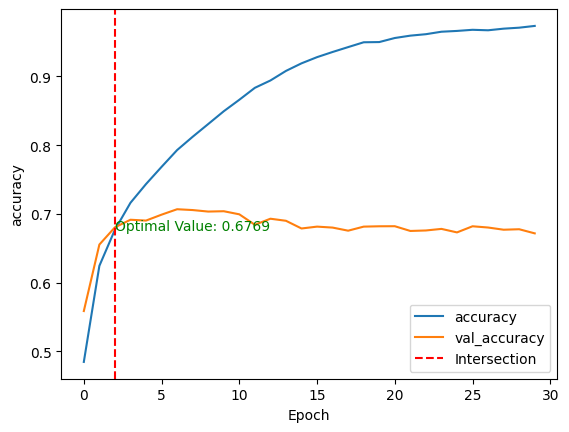

In [24]:
show_performance_curve(training_history, 'accuracy', 'accuracy')


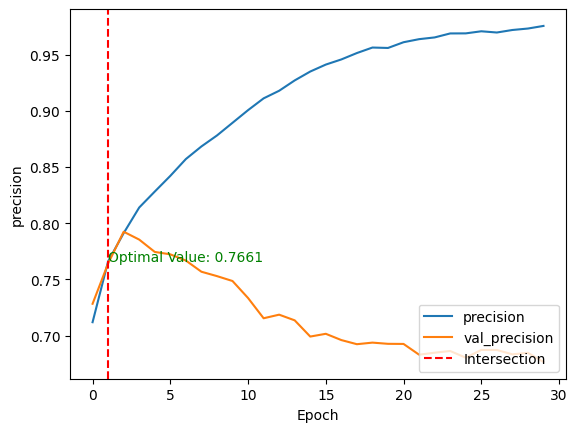

In [25]:
show_performance_curve(training_history, 'precision', 'precision')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


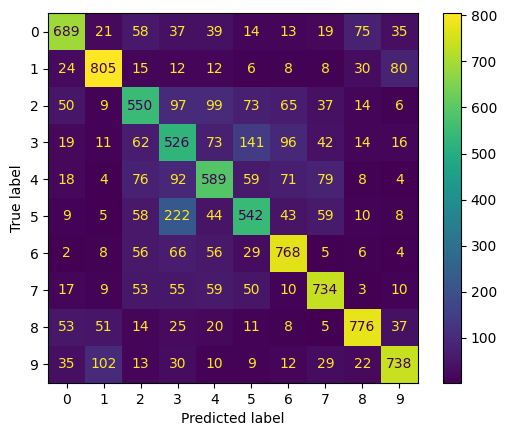

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

test_predictions = model.predict(test_images)

test_predicted_labels = np.argmax(test_predictions, axis=1)

test_true_labels = np.argmax(test_labels, axis=1)

cm = confusion_matrix(test_true_labels, test_predicted_labels)

cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

cmd.plot(include_values=True, cmap='viridis',
         ax=None, xticks_rotation='horizontal')
plt.show()
